# Introduction

In this notebook we are going to study if there is a correlation between the ouput of a country and the life expectancy of its inhabitants. However this is not the only aim of our work, because in parallel we are going to explain some computational and statical aspects.

These are some of the steps that we will follow:
+ Prepare the data.
+ Apply statistics to our data.
+ Represent with plots some aspects of our data.

**Data sources** 

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import libraries

In this work we need the following aditional python modules:
 
- **NumPy**. Fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays. ([link](https://numpy.org/doc/stable/user/whatisnumpy.html))
- **Pandas**. Fundamental for doing practical, real world data analysis in Python. A very powerful and flexible open source data analysis / manipulation tool. ([link](https://pandas.pydata.org/about/))
- **Matplotlib**. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. ([link](https://matplotlib.org))
- **Seaborn**.  Python data visualization library based on matplotlib, that provides a high-level interface for drawing attractive and informative statistical graphics. ([link](https://seaborn.pydata.org))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and inspecting and preparing the data
The data provided in the file `all_data.csv` will be read and save in an pandas dataframe called `df`. It is also a good idea to inspect the loaded data with the function `head()` that by default show the first five rows of the dataframe.

In [2]:
df = pd.read_csv('all_data.csv') # load the data into pandas dataframe
df.head(3) # inspect the data

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10


Also is convenient to check the shape (dimensions) of `df` by using the function `shape`. The output shows that `df` has 96 rows and 4 columns. 

In [3]:
df.shape

(96, 4)

We can use the function `dtypes` to check the data types of `df`.

In [4]:
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

+ `Country` contains `object` data, that correspondes to text or mixed (text and numbers) python data types.
+ `Life expectancy at birth (years)` and ` GDP` contains floating point numbers.
+ `Year` data is and integer python number.

Blank spaces in column names can cause problems when handling data. Also is a good idea to code all column names in lowercase for consistence. 

In [5]:
df = df.rename(columns={"Life expectancy at birth (years)": 'leaby'})
df = df.rename(columns=str.lower) # change all column name to lowercase for consistency

In [6]:
df.head()

,country,year,leaby,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Exploring the data

We need to find out the countries and years included in the data.

In [7]:
# find out how many countries are considered in this dataset
print(df.country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The years included are 2000-2015.

In [8]:
# find out years considered 
print(df.year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Exploratory plots

How are distributed the variables `gdp` and `leaby`? 

<Figure size 576x432 with 0 Axes>

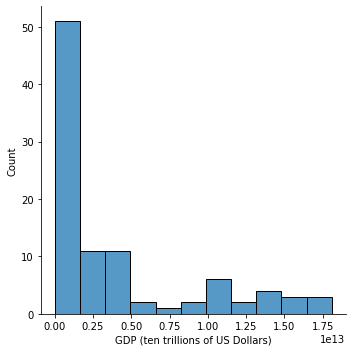

In [9]:
plt.figure(figsize=(8, 6))
sns.displot(df.gdp)
plt.xlabel('Gross Domestic Product (US Dollars)')
plt.show()

The distribution of `gdp` is very right skewed, with most of the data lying in the left side of the graph. These distribition is very similar to a **power law** that states that a relative change in a variable results in a proportional change in the other, having the form $Y= k X^a$. 

The power law can be used to describe a phenomenon where a small number of items is clustered at the top of a distribution (or at the bottom). [link](https://www.statisticshowto.com/power-law/)

<Figure size 576x432 with 0 Axes>

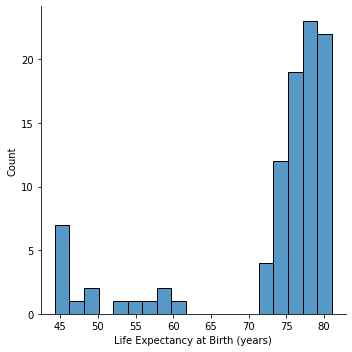

In [10]:
plt.figure(figsize=(8, 6))
sns.displot(df.leaby)
plt.xlabel('Life Expectancy at Birth (years)')
plt.show()

The distribution of `leaby` is very left skewed, with most of the data lying in the right side of the graph. This distribution is almost the exact opposite of the `gdp`.

## Life expectancy and GDP in different countries

We can store the average life expectancy of different countries in a new dataframe. 

In [11]:
mean_country_df = df.groupby('country')[['leaby', 'gdp']].mean().reset_index()
mean_country_df

,country,leaby,gdp
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


According to their life expectancy we can classify the countries in three groups:

1. Germany, Chile and the United States of America, with a life expectancy higher than 78 years.
2. Mexico and Chile, with a life expectancy about 75 years.
3. Zimbawe, with a life expectancy of 50 years.

We can represent graphically these data. 

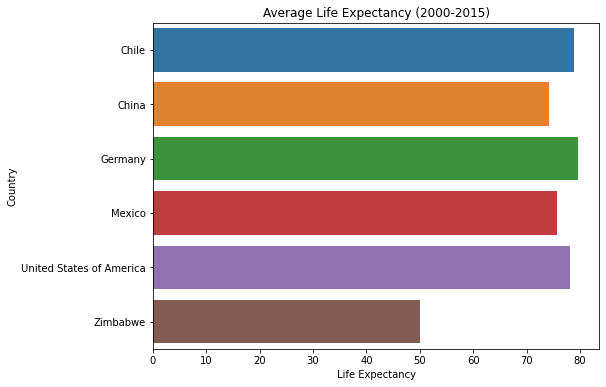

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_country_df, x='leaby', y='country')
plt.title('Average Life Expectancy (2000-2015)')
plt.ylabel('Country')
plt.xlabel('Life Expectancy')
plt.show()

GDP data are much harder to interpret numerically, and for this reason a good visualization in specially important. 

In this case the difference between countries is very noticeable (more than 3 orders of magnitude between the lower and the higher value). 

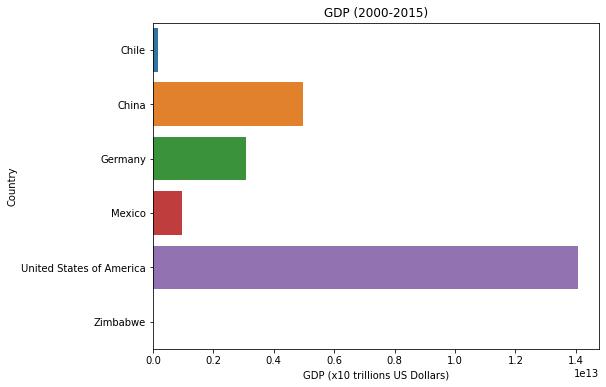

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_country_df, x='gdp', y='country')
plt.title('GDP (2000-2015)')
plt.ylabel('Country')
plt.xlabel('Gross Domestic Product (US Dollars)')
plt.show()

## Global Life Expectancy and GDP through Years

If we want to examine the evolution of these variables, we can perform a similar operation, grouping by `year`, instead of by `country`. 

In [14]:
mean_year_df = df.groupby('year')[['leaby', 'gdp']].mean().reset_index()
mean_year_df

,year,leaby,gdp
0,2000,70.766667,2.371583e+12
1,2001,70.833333,2.448752e+12
2,2002,70.950000,2.561221e+12
3,2003,71.033333,2.743446e+12
4,2004,71.300000,2.991647e+12
5,2005,71.483333,3.207074e+12
6,2006,71.950000,3.463349e+12
7,2007,72.300000,3.785750e+12
8,2008,72.666667,4.055986e+12
9,2009,73.066667,4.000653e+12


It is shown a constant increase in the global life expectancy from 71.77 years in 2000 to 75.71 in 2015.

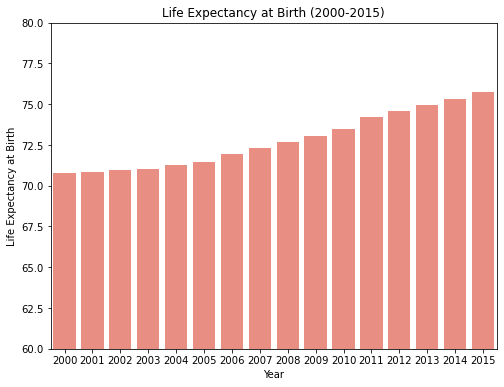

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_year_df, x='year', y='leaby', color='salmon')
plt.ylim(60, 80) # set the range of the y values for better visualization

plt.title('Life Expectancy at Birth (2000-2015)')
plt.ylabel('Life Expectancy at Birth')
plt.xlabel('Year')

plt.show()

On the other hand we can obseve and increase on the GDP in this time series, with the noticeable exception of the transiton 2008-2009, year of the Great Recession. [link](https://en.wikipedia.org/wiki/Great_Recession)

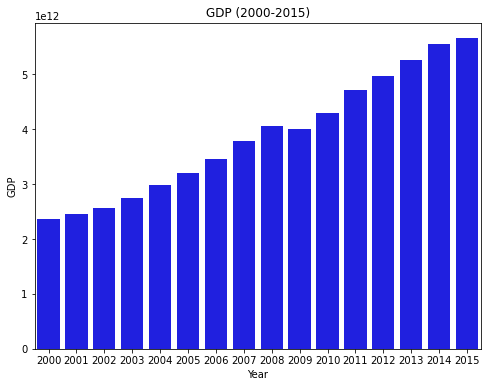

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_year_df, x='year', y='gdp', color='blue')
plt.title('Gross Domestic Product (2000-2015)')
plt.ylabel('Gross Domestic Product (US Dollars)')
plt.xlabel('Year')


plt.show()

# Change in Life Expectancy and GDP through Years in Different Countries 

Until this moment we have considered a global perspective, both spacial (grouping the data of all the countries) or temporal (grouping the data of all years). However, it is very interesting investigate how these variables have changed through the time in every country. For this task boxplots are very convinient.

Boxplots and violinplots are a methods for graphically depicting a numerical data through their quartiles. We use violinplots because in addition to the statistics provided by box plots, they show the probability distributions of the data.

In addition `stripplot` draw a scatterplot where one of the variables is categorical, being a good complement to a box plot. 

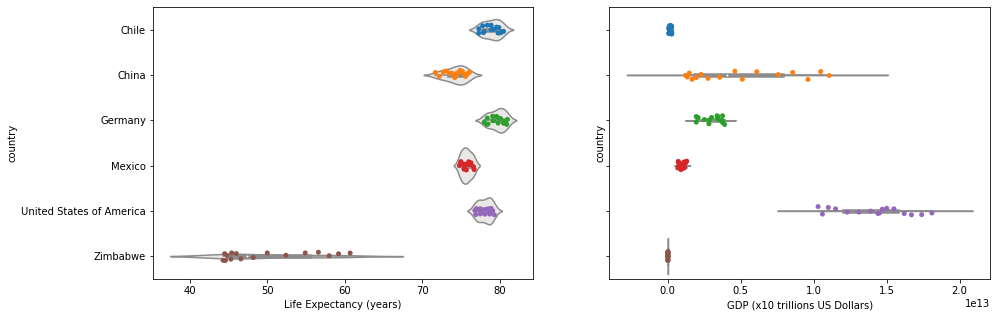

In [17]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
ax[0] = sns.violinplot(ax=ax[0], y=df.country, x=df.leaby, color='#ECE6E5')
ax[0] = sns.stripplot(ax=ax[0], y=df.country, x=df.leaby)
ax[0].set_xlabel('Life Expectancy (years)')

ax[1] = sns.violinplot(ax=ax[1], y=df.country, x=df.gdp, color='#ECE6E5')
ax[1] = sns.stripplot(ax=ax[1], y=df.country, x=df.gdp)
ax[1].set_xlabel('Gross Domestic Product (US Dollars)')


plt.show()

The function `sns.lineplot` allows to represent the evolution of `gdp` and `leaby`, in separated lines for each country.

## Evolution of GDP

Text(0, 0.5, 'GDP (x10 trillions US Dollars')

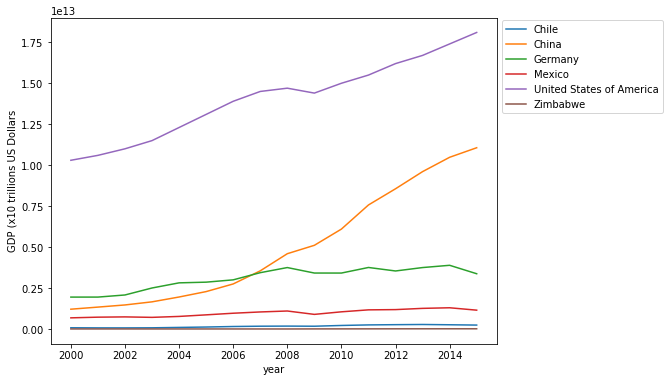

In [18]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.year, y=df.gdp, hue=df.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1)
plt.ylabel('Gross Domestic Product (US Dollars)')

Because of the high variance among the GDP of different countries it may be a good idea to represent the data in different axis, so we can have a better understanding of the individual evolution.

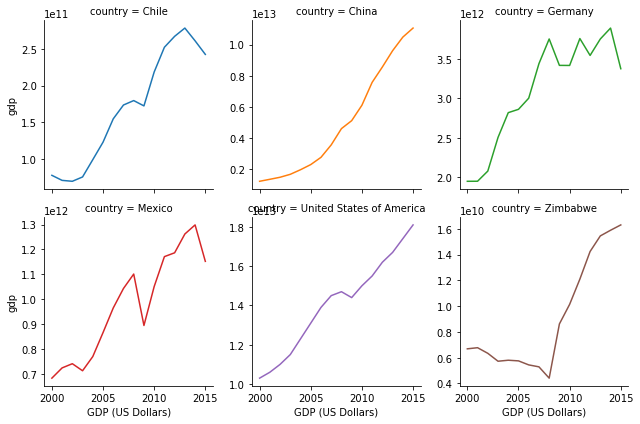

In [19]:
grid = sns.FacetGrid(df, col="country", hue='country', col_wrap=3, sharey=False)
grid.map(sns.lineplot, 'year', 'gdp').set_axis_labels('Gross Domestic Product (US Dollars)')

## Evolution of Life Expectancy

Text(0, 0.5, 'Life Expectancy')

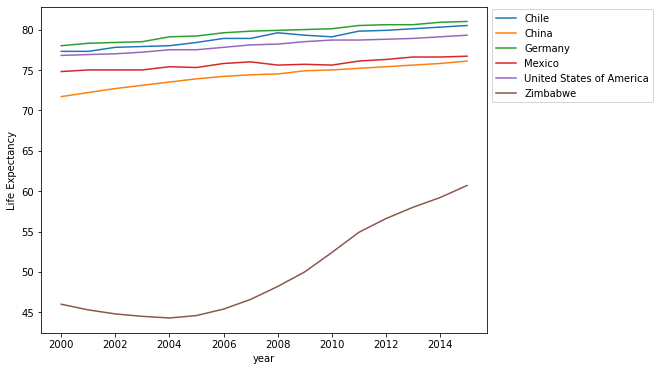

In [20]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.year, y=df.leaby, hue=df.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1)
plt.ylabel('Life Expectancy')

# Relation between GDP and Life Expectancy

Text(0, 0.5, 'Life Expectancy')

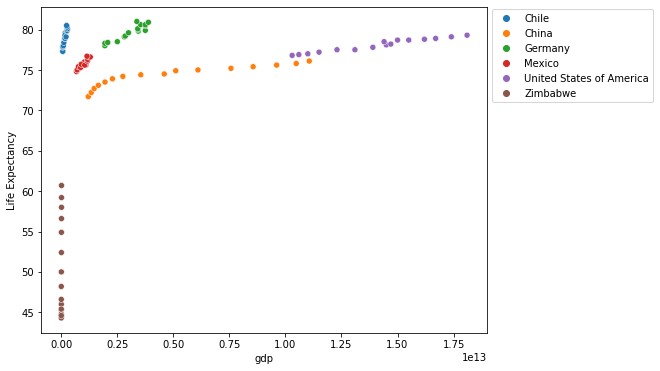

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.gdp, y=df.leaby, hue=df.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1)
plt.ylabel('Life Expectancy (Years)')
plt.xlabel('Gross Domestic Product (US Dollars)')

[]

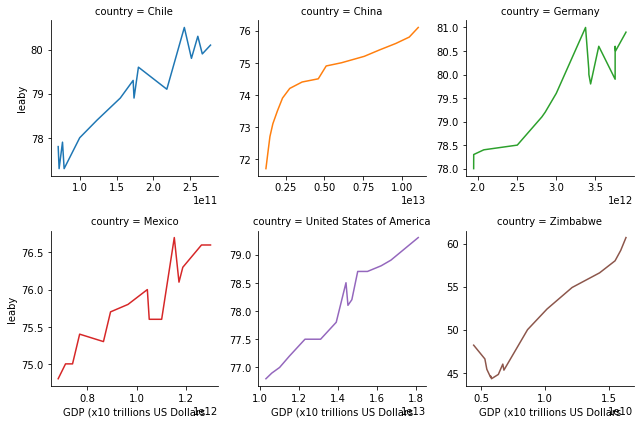

In [22]:
grid = sns.FacetGrid(df, col="country", hue='country', col_wrap=3, sharex=False, sharey=False)
grid.map(sns.lineplot, 'gdp', 'leaby').set_axis_labels('GDP (x10 trillions US Dollars')
plt.plot()